# PLAYING WITH DATA

Códgo Jorge y Paula

## ENVIRONMENT

In [71]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## DATASET

In [6]:
data = pd.read_csv("train.csv")

In [7]:
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


### PREGUNTA 1


In [8]:
data.shape

(26729, 10)

In [9]:
cells = data.shape[0]*data.shape[1]

In [10]:
cells

267290

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [16]:
nulls = cells - 26729 - 19038 - 26729 - 26729 - 13117 - 26729 - 26728 - 26711 - 26729 - 26729

In [17]:
nulls

21322

In [203]:
data.isnull().sum().sum()

21340

In [18]:
(nulls*100)/cells

7.9771035205207825

### PREGUNTA 2

In [24]:
data.dtypes

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [26]:
data.describe().T

,count,unique,top,freq
AnimalID,26729,26729,A705719,1
Name,19038,6374,Max,136
DateTime,26729,22918,2015-08-11 00:00:00,19
OutcomeType,26729,5,Adoption,10769
OutcomeSubtype,13117,16,Partner,7816
AnimalType,26729,2,Dog,15595
SexuponOutcome,26728,5,Neutered Male,9779
AgeuponOutcome,26711,44,1 year,3969
Breed,26729,1380,Domestic Shorthair Mix,8810
Color,26729,366,Black/White,2824


TIPOS VARIABLES<br>
Numerica:<br>
Categorica ordinal o nominal:<br>
Descriptiva:<br>
Fecha:<br>
ID:<br>

### PREGUNTA 3

In [35]:
data.drop_duplicates().shape

(26729, 10)

No hay duplicados

### PREGUNTA 4

In [204]:
for column in data.columns:
    print(f'Column Name: {column}')
    print(f'Number of unique values: {len(data[column].unique())}')
    if len(data[column].unique()) < 30:
        print(f'Unique values: {data[column].unique()}')

Column Name: AnimalID
Number of unique values: 26729
Column Name: Name
Number of unique values: 6375
Column Name: DateTime
Number of unique values: 22918
Column Name: OutcomeType
Number of unique values: 5
Unique values: ['Return_to_owner' 'Euthanasia' 'Adoption' 'Transfer' 'Died']
Column Name: OutcomeSubtype
Number of unique values: 17
Unique values: [nan 'Suffering' 'Foster' 'Partner' 'Offsite' 'SCRP' 'Aggressive'
 'Behavior' 'Rabies Risk' 'Medical' 'In Kennel' 'In Foster' 'Barn'
 'Court/Investigation' 'Enroute' 'At Vet' 'In Surgery']
Column Name: AnimalType
Number of unique values: 2
Unique values: ['Dog' 'Cat']
Column Name: SexuponOutcome
Number of unique values: 6
Unique values: ['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]
Column Name: AgeuponOutcome
Number of unique values: 45
Column Name: Breed
Number of unique values: 1380
Column Name: Color
Number of unique values: 366
Column Name: days
Number of unique values: 44
Column Name: Genre
Number of 

### PREGUNTA 5

In [205]:
for value in data['OutcomeType'].unique():
    num = len(data[data['OutcomeType'] == value])
    prob = num/data.shape[0]
    print(f'Prob {value} is {prob}')

Prob Return_to_owner is 0.1790564555351865
Prob Euthanasia is 0.05817651240225972
Prob Adoption is 0.40289573122825395
Prob Transfer is 0.3525010288450746
Prob Died is 0.007370271989225186


### PREGUNTA 6

In [57]:
cats = data[data['AnimalType'] == 'Cat']
dogs = data[data['AnimalType'] == 'Dog']               

In [58]:
cats.shape

(11134, 10)

In [59]:
dogs.shape

(15595, 10)

#### CATS

In [64]:
outcome_data_cats = pd.DataFrame(cats.OutcomeType.value_counts()).reset_index()
outcome_data_cats

,index,OutcomeType
0,Transfer,5505
1,Adoption,4272
2,Euthanasia,710
3,Return_to_owner,500
4,Died,147


In [65]:
for x in range(len(outcome_data_cats)):
   print(outcome_data_cats.OutcomeType.iloc[x]*100/sum(outcome_data_cats.OutcomeType))

49.44314711693911
38.368959942518416
6.376863660858631
4.490749056942698
1.3202802227411532


#### DOGS

In [68]:
outcome_data_dogs = pd.DataFrame(dogs.OutcomeType.value_counts()).reset_index()
outcome_data_dogs

,index,OutcomeType
0,Adoption,6497
1,Return_to_owner,4286
2,Transfer,3917
3,Euthanasia,845
4,Died,50


In [69]:
for x in range(len(outcome_data_dogs)):
   print(outcome_data_dogs.OutcomeType.iloc[x]*100/sum(outcome_data_dogs.OutcomeType))

41.66078871433152
27.483167681949343
25.11702468739981
5.418403334402052
0.3206155819172812


Se puede hacer con un crosstab

### PREGUNTA 7

In [90]:
x = data[['OutcomeSubtype', 'AnimalID']].groupby('OutcomeSubtype').count().reset_index()
x = x.sort_values(by='AnimalID', ascending=False)

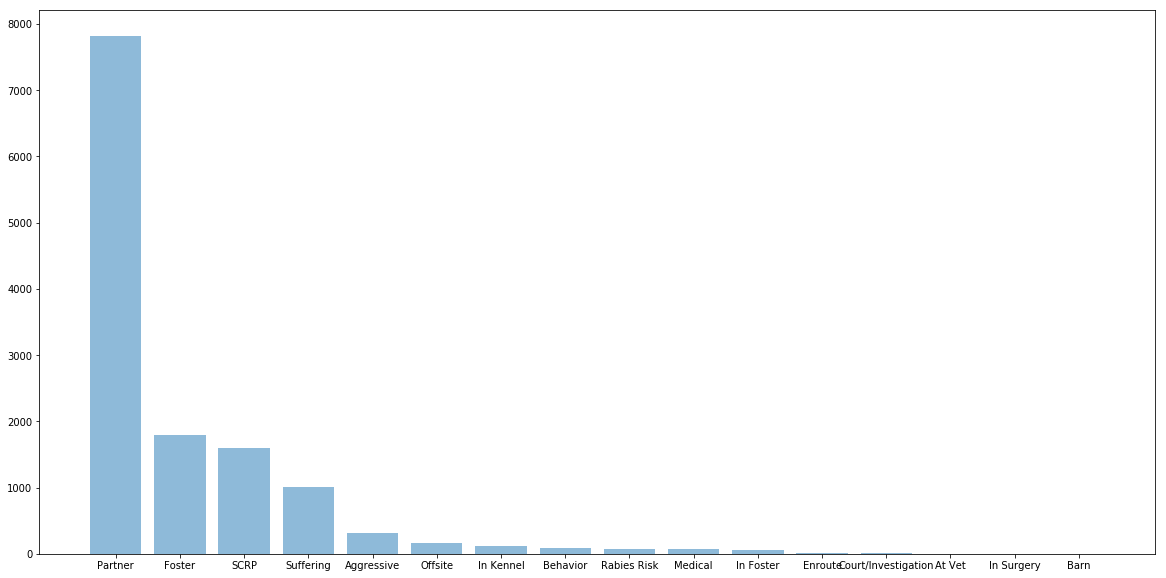

In [102]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x['OutcomeSubtype'], x['AnimalID'], align='center', alpha=0.5)
plt.show()

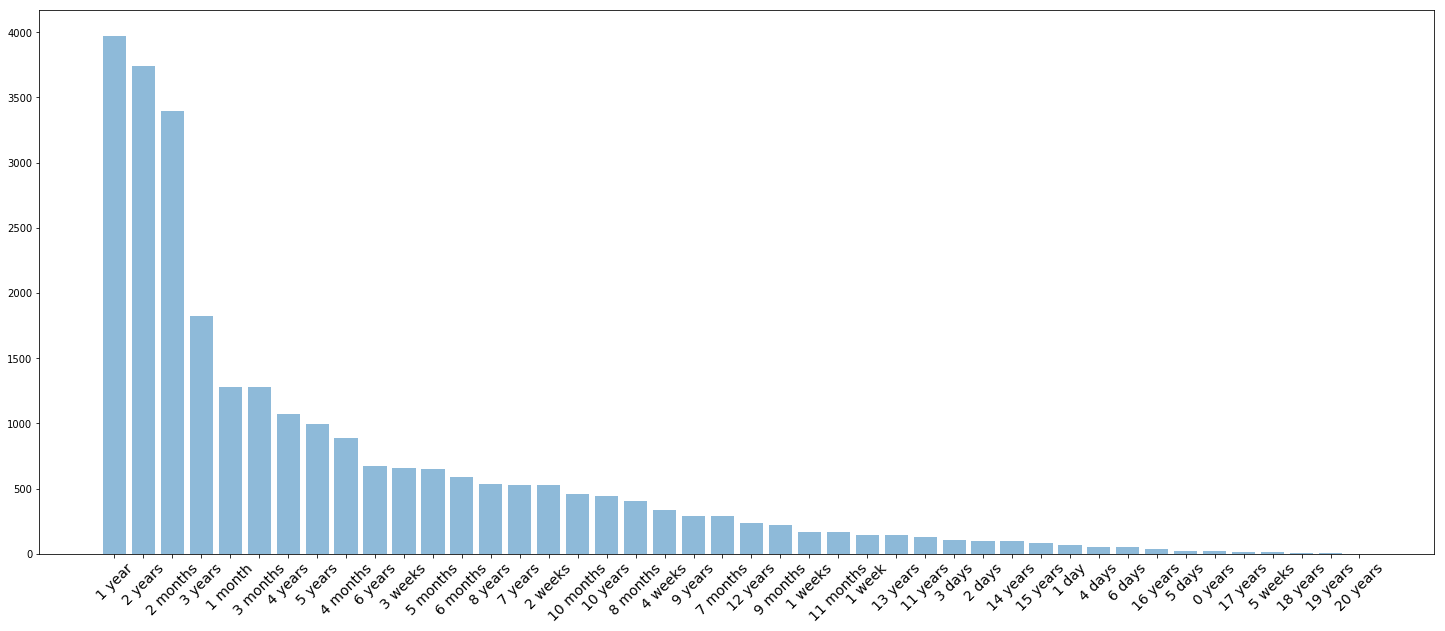

In [110]:
y = data[['AgeuponOutcome', 'AnimalID']].groupby('AgeuponOutcome').count().reset_index()
y = y.sort_values(by='AnimalID', ascending=False)
fig, ax = plt.subplots(figsize=(25, 10))
plt.bar(y['AgeuponOutcome'], y['AnimalID'], align='center', alpha=0.5)
plt.xticks(fontsize=14, rotation=45)
plt.show()

In [135]:
def transform(val):
    val = str(val)
    if val != val:
        pass
    elif ' years' in val:
        val = val.replace(' years', '')
        val = float(val)*365
    elif ' year' in val:
        val = val.replace(' year', '')
        val = float(val)*365
    elif ' weeks' in val:
        val = val.replace(' weeks', '')
        val = float(val)*7
    elif ' week' in val:
        val = val.replace(' week', '')
        val = float(val)*7
    elif ' months' in val:
        val = val.replace(' months', '')
        val = float(val)*30
    elif ' month' in val: 
        val = val.replace(' month', '')
        val = float(val)*30
    elif ' days' in val:
        val = val.replace(' days', '')
        val = float(val)
    elif ' day' in val:
        val = val.replace(' day', '')
        val = float(val)
    return float(val)

In [137]:
data['days'] = data['days'].apply(transform)

In [138]:
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,days
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0


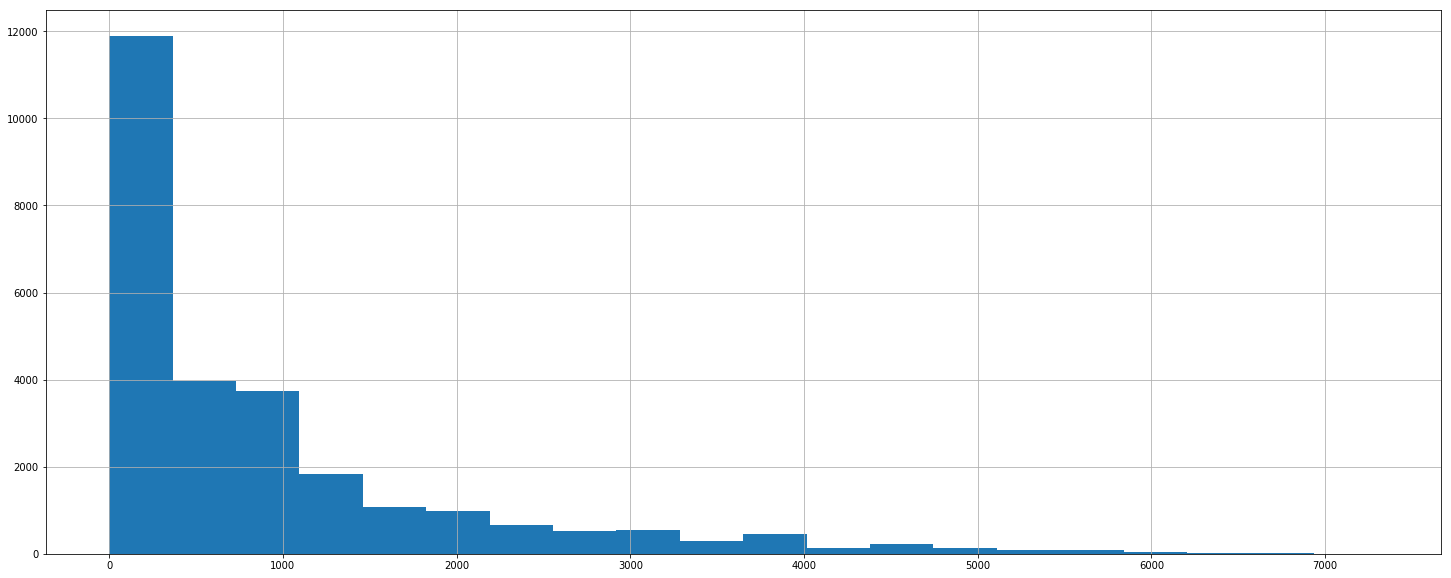

In [207]:
fig, ax = plt.subplots(figsize=(25, 10))
data['days'].hist(bins=20)
plt.show()

RIGHT SKEEWED

### PREGUNTA 8

In [164]:
pivot = pd.pivot_table(index=data['OutcomeType'], columns=data['SexuponOutcome'], aggfunc=['count'], values = ['AnimalID'], data=data)

In [165]:
pivot

count                                                
                     AnimalID                                                
SexuponOutcome  Intact Female Intact Male Neutered Male Spayed Female Unknown
OutcomeType                                                                  
Adoption                203.0       158.0        5222.0        5186.0     NaN
Died                     56.0        79.0          19.0          18.0    25.0
Euthanasia              401.0       477.0         344.0         232.0   101.0
Return_to_owner         301.0       477.0        2247.0        1748.0    12.0
Transfer               2550.0      2334.0        1947.0        1636.0   955.0

In [167]:
def transform_gen(val):
    val = str(val)
    if val != val:
        pass
    elif 'Male' in val:
        val = 'Male'
    elif 'Female' in val:
        val = 'Female'
    return val

In [168]:
data['Genre'] = data['SexuponOutcome'].apply(transform_gen)

In [169]:
data

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,days,Genre
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0,Male
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0,Female
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0,Male
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0,Male
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0,Male
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,30.0,Female
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,21.0,Male
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,21.0,Unknown
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,150.0,Female
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,365.0,Female


In [170]:
pivot = pd.pivot_table(index=data['OutcomeType'], columns=data['Genre'], aggfunc=['count'], values = ['AnimalID'], data=data)

In [171]:
pivot

count                     
                AnimalID                     
Genre             Female    Male Unknown  nan
OutcomeType                                  
Adoption          5389.0  5380.0     NaN  NaN
Died                74.0    98.0    25.0  NaN
Euthanasia         633.0   821.0   101.0  NaN
Return_to_owner   2049.0  2724.0    12.0  1.0
Transfer          4186.0  4281.0   955.0  NaN

In [175]:
len(data[data['Genre'] == 'Male'])

13304

In [176]:
len(data[data['Genre'] == 'Female'])

12331

In [183]:
for out in data['OutcomeType'].unique():
    print('##############')
    print(out)
    for genre in ['Male','Female']:
        print(genre)
        print(len(data[(data['OutcomeType'] == out) & (data['Genre'] == genre)])/len(data[data['Genre'] == genre])*100)

##############
Return_to_owner
Male
20.47504509921828
Female
16.61665720541724
##############
Euthanasia
Male
6.171076368009621
Female
5.133403616900495
##############
Adoption
Male
40.438965724594105
Female
43.70286270375476
##############
Transfer
Male
32.178292242934454
Female
33.94696293893439
##############
Died
Male
0.7366205652435358
Female
0.6001135349931068


### PREGUNTA 9

In [189]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [190]:
data['month'] = data['DateTime'].dt.month

In [191]:
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,days,Genre,month
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0,Male,2
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0,Female,10
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0,Male,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0,Male,7
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0,Male,11


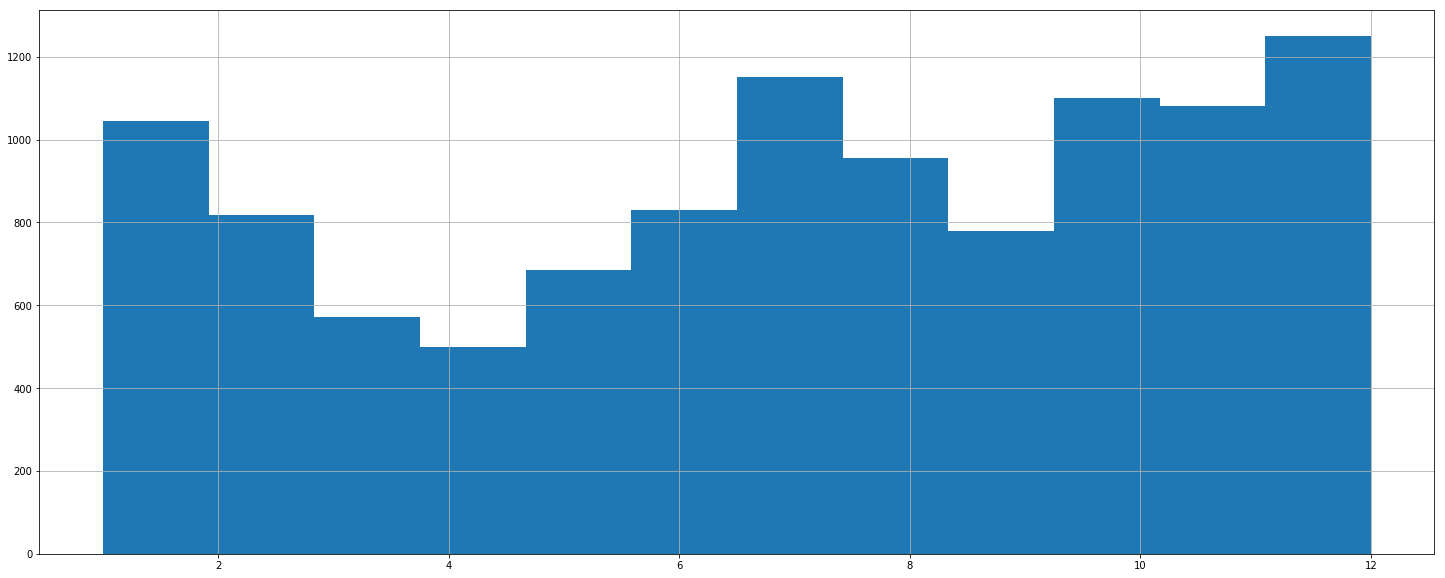

In [198]:
adoption = data[data['OutcomeType'] == 'Adoption']
fig, ax = plt.subplots(figsize=(25, 10))
adoption['month'].hist(bins=12)
plt.show()

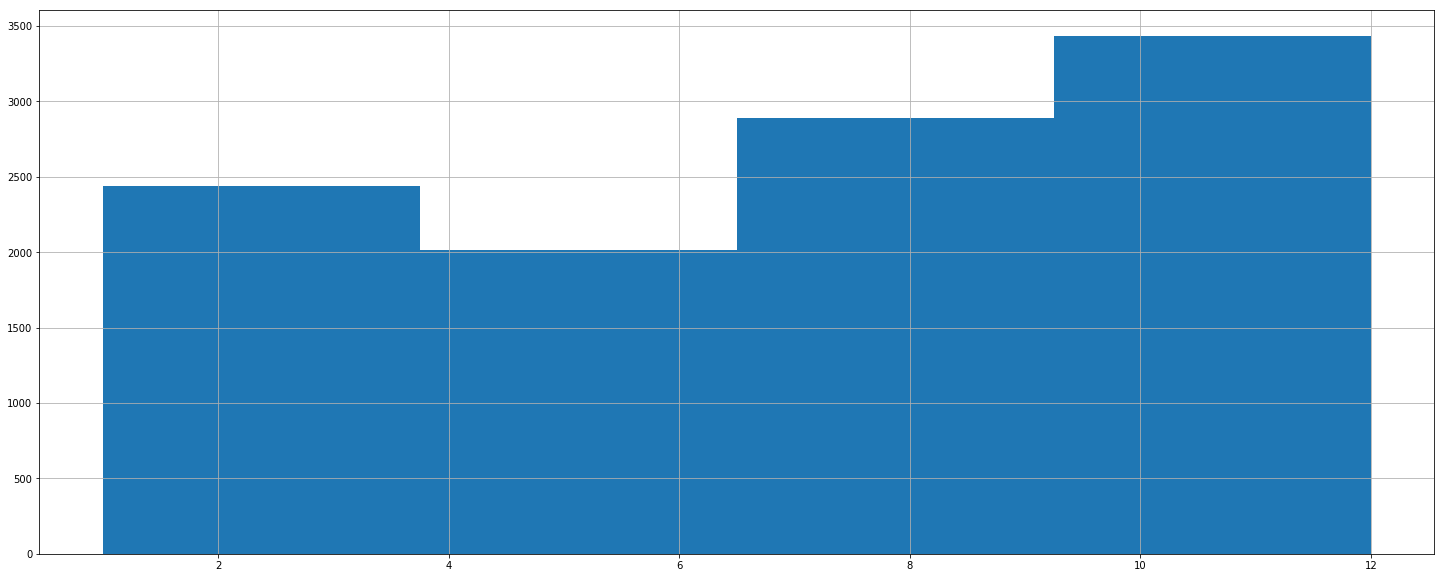

In [199]:
adoption = data[data['OutcomeType'] == 'Adoption']
fig, ax = plt.subplots(figsize=(25, 10))
adoption['month'].hist(bins=4)
plt.show()

Menos adopciones en primavera y más a final de año

### PREGUNTA 10

Coger 10000 random<br>
comprar la media del total con la del sample con un ttest

### PREGUNTA 11